In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.io as pio
import matplotlib.image as mpimg
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

In [10]:
Data=pd.read_csv('crimes_against_women_2001-2014.csv')
Data

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


## Data Preprocessing

In [11]:
Data=Data.drop(['Unnamed: 0'],axis=1)


In [12]:
Data

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             10677 non-null  object
 1   DISTRICT                                             10677 non-null  object
 2   Year                                                 10677 non-null  int64 
 3   Rape                                                 10677 non-null  int64 
 4   Kidnapping and Abduction                             10677 non-null  int64 
 5   Dowry Deaths                                         10677 non-null  int64 
 6   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 7   Insult to modesty of Women                           10677 non-null  int64 
 8   Cruelty by Husband or his Relatives                  10677 non-null  int64 


In [14]:
# Stastical analysis the data informations
Data.describe().style.background_gradient(cmap='Spectral_r')

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000
mean,2007.697949,57.989885,69.888358,20.181699,113.539196,27.419313,209.224314,0.175330
std,4.046874,214.230398,311.623450,98.276531,458.903951,167.806797,905.664362,2.228637
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000,0.000000
75%,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000,0.000000
max,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


In [17]:
# Checking the null values in the data set
Data.isna().sum()/len(Data)*100

STATE/UT                                               0.0
DISTRICT                                               0.0
Year                                                   0.0
Rape                                                   0.0
Kidnapping and Abduction                               0.0
Dowry Deaths                                           0.0
Assault on women with intent to outrage her modesty    0.0
Insult to modesty of Women                             0.0
Cruelty by Husband or his Relatives                    0.0
Importation of Girls                                   0.0
dtype: float64

In [19]:
# Unique states in the data
Data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

In [22]:
# Convert the all the values into the upper cases
Data['STATE/UT']=Data['STATE/UT'].apply(lambda x:x.upper() if isinstance(x,str) else x)
Data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'A&N ISLANDS',
       'D&N HAVELI', 'DELHI UT', 'TELANGANA'], dtype=object)

In [23]:
Data.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

## Explore Data Analysis Process (EDA)

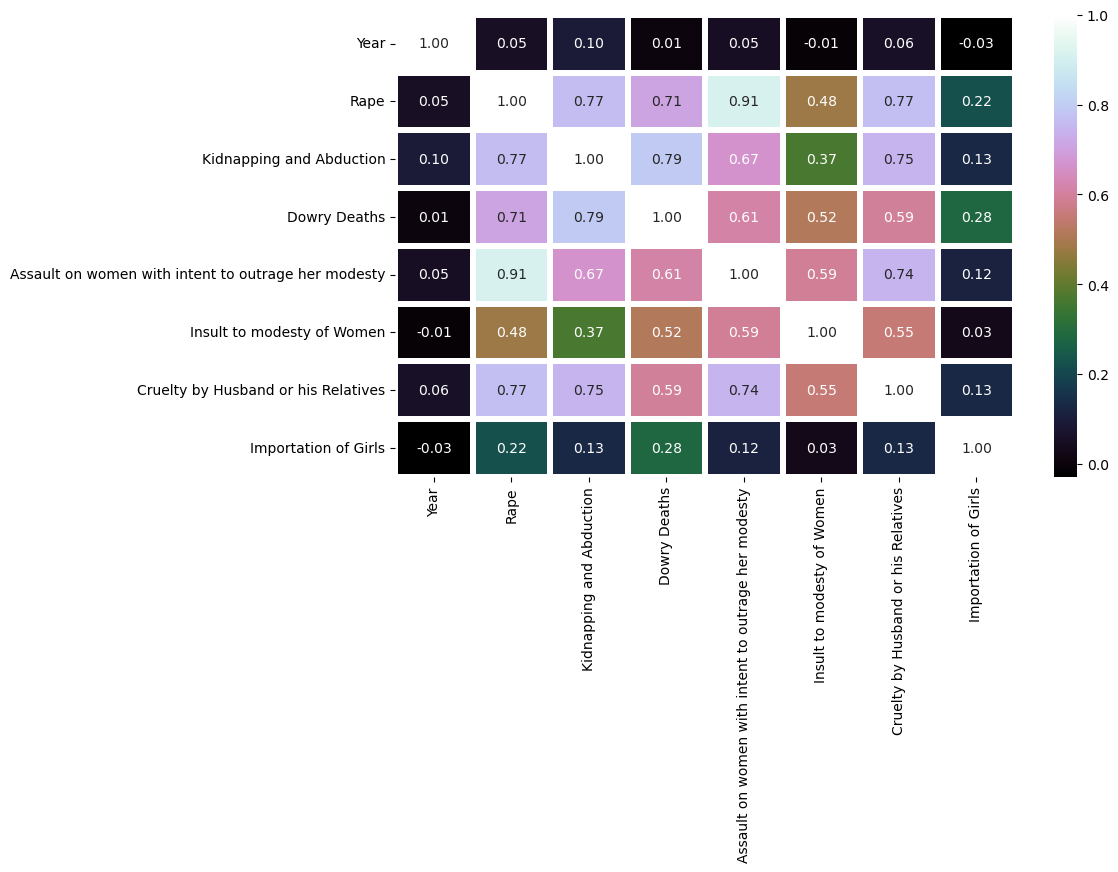

In [25]:
# create correlation map to understand the each columns correlation
plt.figure(figsize=(10,6))
sns.heatmap(Data.corr(),annot=True,cmap='cubehelix',fmt='.2f',linewidths=3)
plt.show()

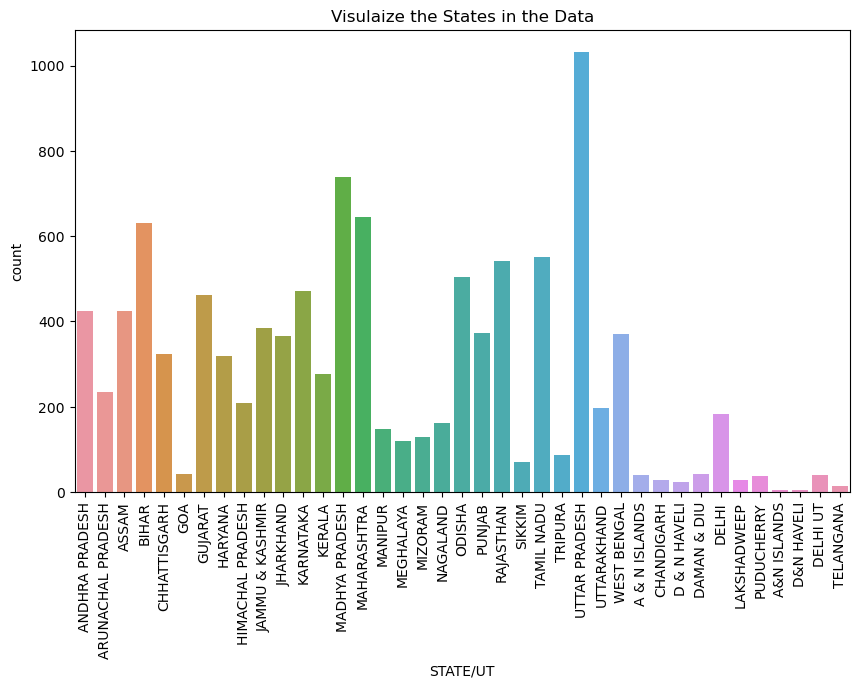

In [34]:
# Create countplot for states
plt.figure(figsize=(10,6))
sns.countplot(data=Data,x=Data['STATE/UT'])
plt.title("Visulaize the States in the Data")
plt.xticks(rotation=90)
plt.show()

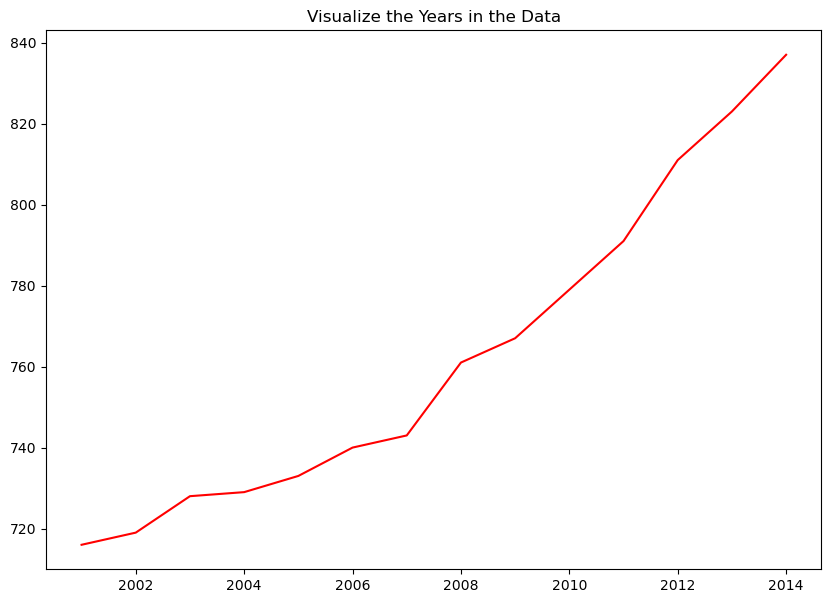

In [36]:
# Create a line chart for year column
plt.figure(figsize=(10,7))
Data['Year'].value_counts().plot(kind='line',color='red')
plt.title("Visualize the Years in the Data")
plt.show()

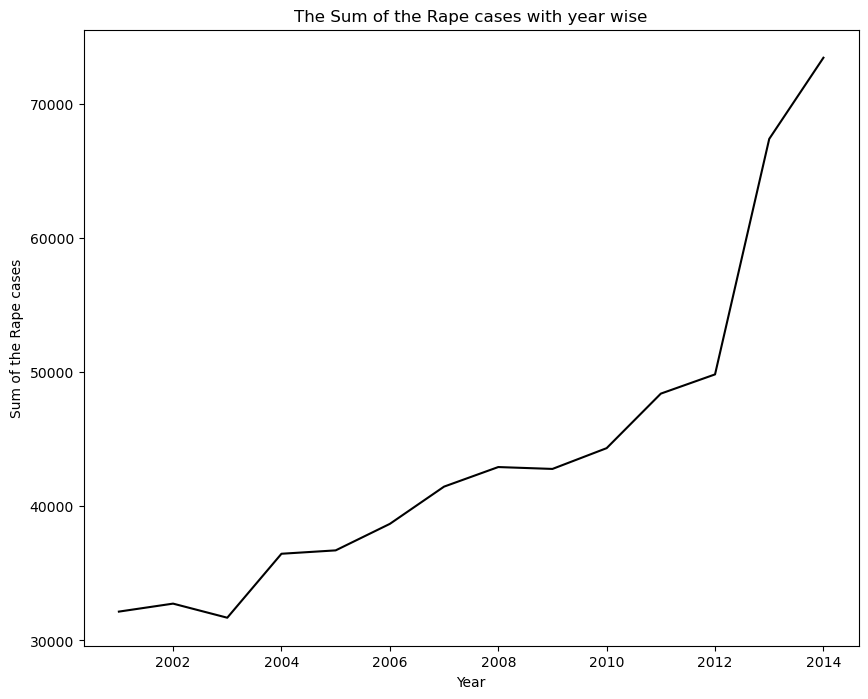

In [37]:
#create a line chart to visualize the sum of the rape cases in year wise
Data.groupby('Year')['Rape'].sum()\
.plot(kind='line',color='black',figsize=(10,8))
plt.title("The Sum of the Rape cases with year wise")
plt.xlabel("Year")
plt.ylabel("Sum of the Rape cases")
plt.show()

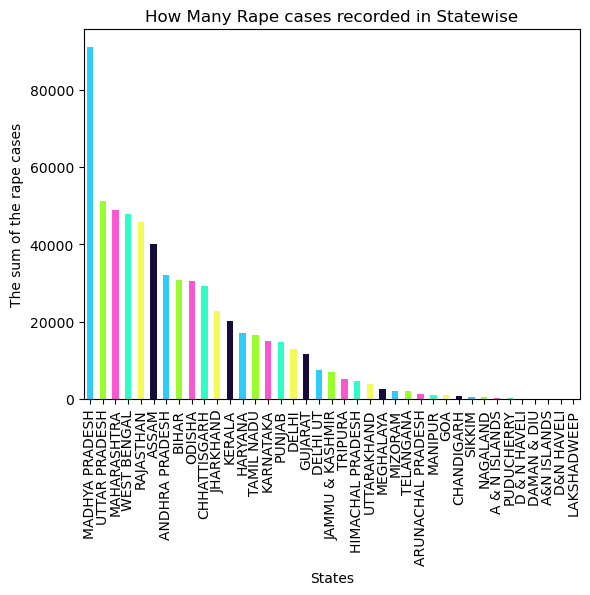

In [39]:
# According the 2001-14 which state have recorded more Rapes
Data.groupby('STATE/UT')['Rape'].sum().sort_values(ascending=False)\
.plot(kind='bar',color=['#2ECCFA','#9AFE2E','#FA58D0','#2EFEC8','#F4FA58','#170B3B'])
plt.title("How Many Rape cases recorded in Statewise")
plt.xlabel("States")
plt.ylabel("The sum of the rape cases")
plt.show()